In [12]:
%run init_notebook.py
from settings import *

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd

In [14]:
class InterestGrowth():
    
    def __init__(self, starting_value, growth_rate):
        
        assert growth_rate <= 1, "Growth rate above 100%"
        self.v = starting_value
        self.r = growth_rate
        pass
    
    def time_value(self, t: int):
#         assert t > 0, "X**0 returns one, start at t=1"
        return self.v * (1 + self.r)**t
#         return self.v

In [15]:
periods = 130
time_space = np.arange(periods)

In [16]:
a0 = 1
v0 = 0
g0 = .1

γ = 1.1
α = .5
δ = .5

cV = 2
cG = 1

ωv0 = 0
ωg0 = 20
ωvote = 20

G = [g0] * periods
V = [v0]
Q = [0]
Wv = [0]
U = [1 - v0 - g0]
A = InterestGrowth(α**(-α)*(1-α)**(α-1)*(2+cV),
                   .02)

ΩV = [ωv0]
ΩG = [ωg0]
Wv = []
Wg = []


assert A.v >= α**(-α)*(1-α)**(α-1)*(2+cV), 'Wg superiority condition not met'

In [17]:
def wealth(ω_1, wage, tuition, δ):
    return δ * (wage - tuition) + ω_1

In [18]:
V = np.zeros((periods, periods))
G = np.zeros((periods, periods))
G[0,0] = g0

Ωv = np.zeros((periods, periods))
Ωg = np.zeros((periods, periods))

for t in range(0, periods):
    
    # stage I
    if 1 - G[t,t] - V[t,t] > 0:
        G[t, t] = g0

        # U -> V new joiners
        vt = (A.time_value(t)*(1-α)/(2+cV))**(1/α) * G[t, t] #- V[:t-1, :t-1].diagonal().sum()
        V[t, t] = vt

        if t > 0:
            for r in range(0, t):
                V[r, t] = V[r, t-1]


        # wage for all V at time t
        wvt = A.time_value(t) * G[t, t]**α * (1-α) * vt**(-α)
        Wv.append(wvt)

        wgt = A.time_value(t) * α * G[t,t]**(-α) * vt**(1-α)
        Wg.append(wgt)

        # wealth for all new joiners (U -> V) at time t
        ωut = 2 * δ * t
        ωvt = wealth(ωut, wvt, cV, δ)
        Ωv[t, t] = ωvt

        # wealth for G at time t
        ωgt = wealth(ωg0, wgt, cG, δ)
        Ωg[t, t] = ωgt

        # wealth for all prior members of V
        for r in range(0, t):
            Ωv[r, t] = wealth(Ωv[r, t-1], wvt, cV, δ)
            Ωg[r, t] = wealth(Ωg[r, t-1], wgt, cG, δ)

        # no voting relavance as Gt constant in stage 1
    
    # Stage 2
    if 1 - G[t, t] - V[t, t] < 0:
        wvt = (1-α) * A.time_value(t) * (G[t,t]/V[t,t])**α
        wgt = α*A.time_value(t)*(V[t,t]/G[t,t])**(1-α)
        
#         ωvt = wealth()
    
    
   
    
    

In [19]:
V.diagonal()

array([ 0.1       ,  0.10404   ,  0.10824322,  0.11261624,  0.11716594,
        0.12189944,  0.12682418,  0.13194788,  0.13727857,  0.14282462,
        0.14859474,  0.15459797,  0.16084372,  0.16734181,  0.17410242,
        0.18113616,  0.18845406,  0.1960676 ,  0.20398873,  0.21222988,
        0.22080397,  0.22972445,  0.23900531,  0.24866113,  0.25870704,
        0.2691588 ,  0.28003282,  0.29134614,  0.30311653,  0.31536244,
        0.32810308,  0.34135844,  0.35514932,  0.36949736,  0.38442505,
        0.39995582,  0.41611404,  0.43292504,  0.45041522,  0.46861199,
        0.48754392,  0.50724069,  0.52773321,  0.54905364,  0.5712354 ,
        0.59431331,  0.61832357,  0.64330384,  0.66929332,  0.69633277,
        0.72446461,  0.75373298,  0.78418379,  0.81586482,  0.84882576,
        0.88311832,  0.9187963 ,  0.95591567,  0.99453466,  1.03471386,
        1.0765163 ,  1.12000756,  1.16525587,  1.2123322 ,  1.26131043,
        1.31226737,  1.36528297,  1.4204404 ,  1.47782619,  1.53

In [22]:
A.time_value(10) * α * .1**(-α) * .3**(1-α)

8.445441078295499

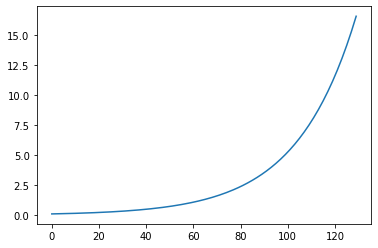

In [9]:
plt.plot(V.diagonal())

In [10]:
t = 10
A.time_value(t) * G[t, t]**α * (1-α) * 0.0000001**(-α)

4875.977679979031

400000.0000000001 4007.3958415254606 4.020151261034818
656242.3977858926 6569.819819387186 4.020151261036094
1076635.2116294436 10773.747957823733 4.020151261036569
2897858.4473009403 28985.980314539236 4.02015126103681
5146146.536872862 51468.8612102585 4.020151261036836


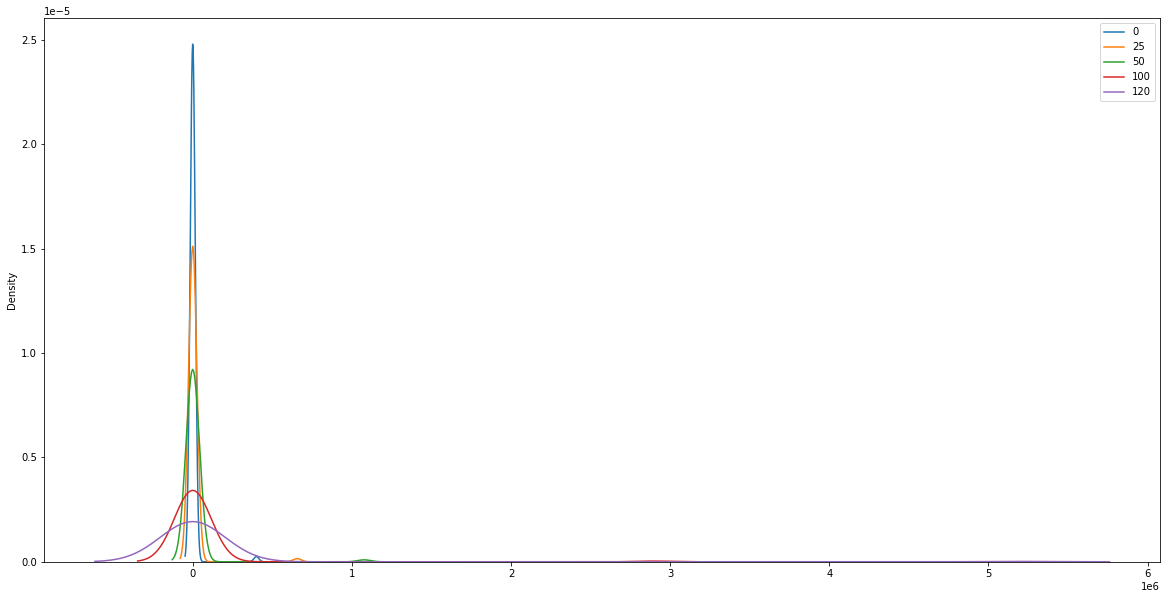

In [11]:
plt.figure(figsize=(20, 10))
kernel_params = []
wages = []
for t in [0, 25, 50, 100, 129]: # range(0, 30):
    wage = []
    for i in np.linspace(0.00000000001, V[t,t], 100, endpoint=False):
        wage.append(A.time_value(t) * G[t, t]**α * (1-α) * i**(-α))
    kernel_params.append(stats.describe(wage))
    wages.append(np.array(wage))
    print(np.max(wage), np.mean(wage), np.min(wage))
    _ = sns.kdeplot(wage)
    
plt.legend(['0', '25', '50', '100', '120']);

In [78]:
from distfit import distfit

In [81]:
kernel_est = distfit()
kernel_est.fit_transform(wages[0])
# print(kernel_est.summary());

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 2.13247e-13] [loc=1000009.685 scale=9949873.398]
[distfit] >[expon     ] [0.00 sec] [RSS: 1.87097e-14] [loc=3.024 scale=1000006.661]
[distfit] >[pareto    ] [0.00 sec] [RSS: 2.45026e-13] [loc=1.522 scale=1.503]
[distfit] >[dweibull  ] [0.20 sec] [RSS: 2.4505e-13] [loc=3.737 scale=227.123]
[distfit] >[t         ] [0.27 sec] [RSS: 2.45018e-13] [loc=4.358 scale=1.201]
[distfit] >[genextreme] [0.30 sec] [RSS: 2.44988e-13] [loc=4.116 scale=1.758]
[distfit] >[gamma     ] [0.28 sec] [RSS: 1.98621e-13] [loc=3.024 scale=60482656.961]
[distfit] >[lognorm   ] [0.42 sec] [RSS: 2.4505e-13] [loc=3.009 scale=3.056]
[distfit] >[beta      ] [0.24 sec] [RSS: 2.15659e-13] [loc=3.024 scale=537805256.137]
[distfit] >[uniform   ] [0.0 sec] [RSS: 2.4005e-13] [loc=3.024 scale=99999996.976]
[distfit] >[loggamma  ] [0.17 sec] [RSS: 2.16914e-13] [loc=-6098148192.240 scale=731063228.457]
[distfit] >Compute confidence interval [parame

{'model': {'distr': <scipy.stats._continuous_distns.expon_gen at 0x23bc7f50be0>,
  'stats': 'RSS',
  'params': (3.0242180353280057, 1000006.66091431),
  'name': 'expon',
  'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x23bd8e527f0>,
  'score': 1.8709705601820466e-14,
  'loc': 3.0242180353280057,
  'scale': 1000006.66091431,
  'arg': (),
  'CII_min_alpha': 51296.66026582446,
  'CII_max_alpha': 2995755.2520879954},
 'summary':          distr score  LLE                loc             scale  \
 0        expon   0.0  NaN           3.024218    1000006.660914   
 1        gamma   0.0  NaN           3.024218   60482656.961284   
 2         norm   0.0  NaN     1000009.685132    9949873.397685   
 3         beta   0.0  NaN           3.024218  537805256.136895   
 4     loggamma   0.0  NaN -6098148192.239908  731063228.456601   
 5      uniform   0.0  NaN           3.024218   99999996.975782   
 6   genextreme   0.0  NaN           4.116278          1.758394   
 7           

[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\nexpon\nRSS(loc=3.02422, scale=1.00001e+06)'}, xlabel='Values', ylabel='Frequency'>)

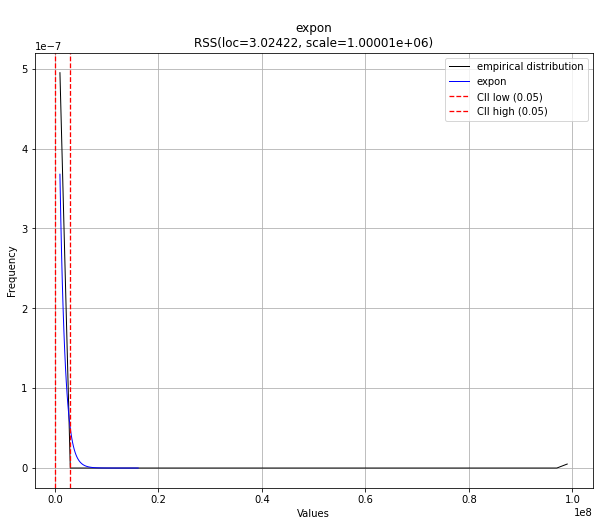

In [82]:
kernel_est.plot()

<AxesSubplot:ylabel='Density'>

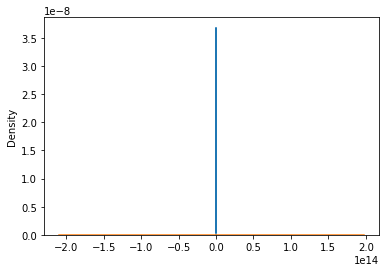

In [65]:
np_kernel = np.random.normal(kernel_params[0].mean, (kernel_params[0].variance)**1/2, 10000)
sns.kdeplot(wage)
sns.kdeplot(np_kernel)

In [55]:
kernel_params[0].mean

1000009.6851323453

In [52]:
kernel_params

[DescribeResult(nobs=100, minmax=(3.0242180353280057, 100000000.00000009), mean=1000009.6851323453, variance=99999980434295.62, skewness=9.849370589507355, kurtosis=95.01010100967301),
 DescribeResult(nobs=100, minmax=(3.0242180353324573, 164060599.4464732), mean=1640615.6795971075, variance=269158770807608.38, skewness=9.849370589528048, kurtosis=95.01010100994202),
 DescribeResult(nobs=100, minmax=(3.024218035334856, 269158802.90736103), mean=2691597.7142060017, variance=724464559162048.6, skewness=9.849370589535734, kurtosis=95.01010101004195)]

In [498]:
def vt_santiy(V, t, α):
    vt = [V[0,0]]
    γ = ((np.roll(V.diagonal(), -1)[:-1] / V.diagonal()[:-1])**α).mean()
    for i in range(0, t):
        vt.append(vt[i-1] * γ**(1/α))
    return vt

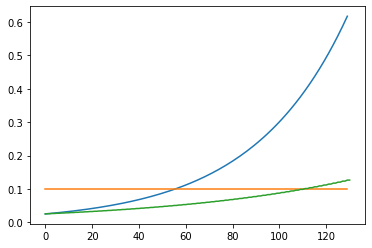

In [499]:
# plt.plot(V.diagonal())
plt.plot(V.diagonal())
plt.plot(G.diagonal())
plt.plot(vt_santiy(V, periods, α))

In [332]:
def voting(gt, vt, V, ΩV, t, min_wealth):
    
    ΩV = ΩV[:t, :t]
    V = V[:t, :t]
    
    thresh = np.where((ΩV >= min_wealth)==True)
    if len(thresh[0]) != 0:
        vt_elec = V[thresh[0][0]:, thresh[1][0]]

    else:
        vt_elec = 0
    
    if gt > vt_elec:
        return gt
    
    else:
#         assert vt >= .5, f'{vt} does not meet size requirment >=.5'
        
        thresh = vt - gt
        
        t_indexV = np.where((V[:, t].cumsum() <= thresh)==True)[0][0]
        
        δ_gt = V[:t_indexV, t].sum()
        
#         return gt + δ_gt

In [340]:
V[0:, :21][:, -1]

array([0.00471556, 0.00487379, 0.00503733, 0.00520636, 0.00538106,
       0.00556162, 0.00574824, 0.00594112, 0.00614048, 0.00634652,
       0.00655948, 0.00677959, 0.00700707, 0.0072422 , 0.00748521,
       0.00773638, 0.00799597, 0.00826428, 0.00854158, 0.0088282 ,
       0.00912443, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     